In [0]:
import tensorflow as tf

In [0]:
import numpy as np

#### some low level function

In [0]:
def Myrelu(X):
    return tf.maximum(X, tf.zeros_like(X))

In [0]:
def mySoftMax(X):
    X_centered = X - tf.reduce_max(X) # to avoid overflow
    X_exp = tf.exp(X_centered)
    exp_sum = tf.reduce_sum(X_exp, axis=1)
    return tf.transpose(tf.transpose(X_exp) / exp_sum)

In [0]:
def Mysigmoid(X):
    return 1.0/(1.0 + tf.math.exp(-X))

In [0]:
def cross_entropy_error(y, t):
    return -tf.reduce_mean(tf.log(tf.reduce_sum(y * t, axis=1)))

## 1. Learning the XOR

In [0]:
# xor task
xor_data = np.array([[1, 0],
                    [0, 1],
                    [1, 1],
                    [0, 0]])
xor_label = np.array([[1], [1], [0], [0]])

In [0]:
learning_rates = 0.01
with tf.Graph().as_default() as g:
    with tf.name_scope('data') as scope:
        X = tf.placeholder(tf.float32, shape=[4,2], name = 'X')
        Y = tf.placeholder(tf.float32, shape=[4,1], name = 'Y')
    
    with tf.name_scope('relu') as scope:
        W1 = tf.Variable(tf.truncated_normal([2,2]), name = 'W1')
        b1 = tf.Variable(tf.zeros([4,2]), name = 'b1')
        relu = Myrelu(tf.add(tf.matmul(X, W1), b1))
        
    with tf.name_scope('sigmoid') as scope:
        W2 = tf.Variable(tf.truncated_normal([2,1]), name = "W2")
        b2 = tf.Variable(tf.zeros([4,1]), name = 'b2')
        prediction = Mysigmoid(tf.add(tf.matmul(relu, W2), b2))
        
    with tf.name_scope("loss") as scope:
        loss = tf.reduce_mean(tf.squared_difference(prediction, Y)) 

    with tf.name_scope('optimizer') as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rates).minimize(loss)
        
    with tf.name_scope("accuracy") as scope:
        t_predict = tf.argmax(prediction, axis=1)
        t_actual = tf.argmax(Y, axis=1)
        acc = tf.reduce_mean(tf.cast(tf.equal(t_predict, t_actual), tf.float32))
        tf.summary.scalar('Accuracy', acc)

In [10]:
with tf.Session(graph=g) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(20001):
        sess.run(optimizer, feed_dict={X: xor_data, Y: xor_label})
    result = sess.run(prediction, feed_dict={X: xor_data, Y: xor_label})
    print("Accuracy: ", sess.run(acc, feed_dict={X:xor_data, Y:xor_label}))
    
    print('w of relu: ')
    for element in sess.run(W1):
        print('    ', element)
    print('bias of relu: ')
    for element in sess.run(b1):
        print('    ', element)
    print('w of sigmoid: ')
    for element in sess.run(W2):
        print('    ', element)
    print('bias of sigmoid: ')
    for element in sess.run(b2):
        print('    ', element)
        
    graph_dir = "graphs/demo"
    # create a writer 
    writer = tf.summary.FileWriter(graph_dir, sess.graph)

Accuracy:  1.0
w of relu: 
     [-1.1005414 -1.6694647]
     [-0.05850164 -0.5328449 ]
bias of relu: 
     [0. 0.]
     [0. 0.]
     [0. 0.]
     [-0.00088206 -0.00045285]
w of sigmoid: 
     [1.4112934]
     [0.72456217]
bias of sigmoid: 
     [2.4099236]
     [2.4099236]
     [-2.4099236]
     [-2.4099236]


## 2. MNIST - Digits classification
### First solution using fully *connected*

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
# load mnist data
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [12]:
print("training data size: {}".format(mnist.train.num_examples))
print("validation data size: {}".format(mnist.validation.num_examples))
print("testing data size: {}".format(mnist.test.num_examples))

print("Shape of image: {}".format(mnist.train.images[0].shape))
print("Shape of label: {}".format(mnist.train.labels[0].shape))

training data size: 55000
validation data size: 5000
testing data size: 10000
Shape of image: (784,)
Shape of label: (10,)


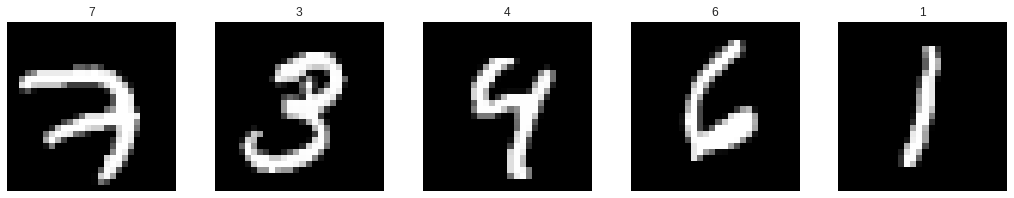

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(18,18))
for i in range(5):
    plt.subplot(n, n, i+1)
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(mnist.train.labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [0]:
# Hyperparameter
learning_rates = 0.5
epochs = 10
batch_size = 100

In [15]:
with tf.Graph().as_default() as g:
    with tf.name_scope('data') as scope:
        x = tf.placeholder(tf.float32, [None, 784])
        y = tf.placeholder(tf.float32, [None, 10])
        
    with tf.name_scope('relu'):
        W1 = tf.Variable(tf.random_normal([784, 400], stddev=0.03), name='W1')
        b1 = tf.Variable(tf.zeros([400]), name='b1')
        relu = Myrelu(tf.add(tf.matmul(x, W1), b1))
        
    with tf.name_scope('softmax'):
        W2 = tf.Variable(tf.random_normal([400, 10], stddev=0.03), name='W2')
        b2 = tf.Variable(tf.zeros([10]), name='b2')
        prediction = mySoftMax(tf.add(tf.matmul(relu, W2), b2))
        
    with tf.name_scope("loss") as scope:
        loss = cross_entropy_error(tf.clip_by_value(prediction, 1e-10, 0.9999999), y) 

    with tf.name_scope('optimizer') as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rates).minimize(loss)
        
    with tf.name_scope("accuracy") as scope:
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        #t_predict = tf.argmax(prediction, axis=1)
        #t_actual = tf.argmax(y, axis=1)
        #acc = tf.reduce_mean(tf.cast(tf.equal(t_predict, t_actual), tf.float32))
        #tf.summary.scalar('Accuracy', acc)

with tf.Session(graph=g) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    num_batch = int(mnist.train.num_examples/batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for _ in range(num_batch):
            train_X, train_ys = mnist.train.next_batch(batch_size)
            optimizer.run(feed_dict={x:train_X, y:train_ys})
            avg_cost += loss.eval(feed_dict={x:train_X, y:train_ys}) / num_batch

        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost), flush=True)

    print("---")
    # 準確率
    test_x = mnist.test.images[:batch_size]
    test_t = mnist.test.labels[:batch_size]
    print("Accuracy: ", sess.run(accuracy, feed_dict={x:test_x, y:test_t}))



Epoch: 0001 cost= 0.191578761
Epoch: 0002 cost= 0.051231673
Epoch: 0003 cost= 0.029451991
Epoch: 0004 cost= 0.019760672
Epoch: 0005 cost= 0.014299860
Epoch: 0006 cost= 0.010624113
Epoch: 0007 cost= 0.008401911
Epoch: 0008 cost= 0.006735386
Epoch: 0009 cost= 0.005512852
Epoch: 0010 cost= 0.004623068
---
Accuracy:  1.0


## 2. MNIST - Digits classification
### Second solution using cnn

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 讀入 MNIST
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True, reshape=False)
# 設定參數
learning_rate = 0.1
training_epochs = 2
batch_size = 100
example_X, example_ys = mnist.train.next_batch(batch_size)





Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
example_X[0].shape


(28, 28, 1)

In [0]:
def flatten(X, window_h, window_w, window_c, out_h, out_w, stride=1, padding=0):
    
    X_padded = tf.pad(X, [[0,0], [padding, padding], [padding, padding], [0,0]])

    windows = []
    for y in range(out_h):
        for x in range(out_w):
            window = tf.slice(X_padded, [0, y*stride, x*stride, 0], [-1, window_h, window_w, -1])
            windows.append(window)
    stacked = tf.stack(windows) # shape : [out_h, out_w, n, filter_h, filter_w, c]

    return tf.reshape(stacked, [-1, window_c*window_w*window_h])

In [0]:
def convolution(X, W, b, padding, stride):
    n, h, w, c = map(lambda d: d.value, X.get_shape())
    filter_h, filter_w, filter_c, filter_n = [d.value for d in W.get_shape()]
    
    out_h = (h + 2*padding - filter_h)//stride + 1
    out_w = (w + 2*padding - filter_w)//stride + 1

    X_flat = flatten(X, filter_h, filter_w, filter_c, out_h, out_w, stride, padding)
    W_flat = tf.reshape(W, [filter_h*filter_w*filter_c, filter_n])
    
    z = tf.matmul(X_flat, W_flat) + b     # b: 1 X filter_n
    
    return tf.transpose(tf.reshape(z, [out_h, out_w, n, filter_n]), [2, 0, 1, 3])

In [0]:
def max_pool(X, pool_h, pool_w, padding, stride):
    n, h, w, c = [d.value for d in X.get_shape()]
    
    out_h = (h + 2*padding - pool_h)//stride + 1
    out_w = (w + 2*padding - pool_w)//stride + 1

    X_flat = flatten(X, pool_h, pool_w, c, out_h, out_w, stride, padding)

    pool = tf.reduce_max(tf.reshape(X_flat, [out_h, out_w, n, pool_h*pool_w, c]), axis=3)
    return tf.transpose(pool, [2, 0, 1, 3])

In [0]:
def affine(X, W, b):
    n = X.get_shape()[0].value # number of samples
    X_flat = tf.reshape(X, [n, -1])
    return tf.matmul(X_flat, W) + b

In [11]:

## template
with tf.Graph().as_default() as g:
    """ Define dataset and iterator """
    with tf.name_scope("data"):
        X = tf.placeholder('float', [batch_size, 28, 28, 1])
        t = tf.placeholder('float', [batch_size, 10])
    
    """ Build the model """
    with tf.name_scope("con1"):
        filter_h, filter_w, filter_c, filter_n = 5, 5, 1, 30
        W1 = tf.Variable(tf.random_normal([filter_h, filter_w, filter_c, filter_n], stddev=0.01))
        b1 = tf.Variable(tf.zeros([filter_n]))
        conv_layer = convolution(X, W1, b1, padding=2, stride=1)
        
    with tf.name_scope("activation"):
        conv_activation_layer = Myrelu(conv_layer)
    
    with tf.name_scope("max_pool1"):
        pooling_layer = max_pool(conv_activation_layer, pool_h=2, pool_w=2, padding=0, stride=2)
    
    with tf.name_scope("fcn1"):
        batch_size, pool_output_h, pool_output_w, filter_n = [d.value for d in pooling_layer.get_shape()]
        hidden_size = 100
        W2 = tf.Variable(tf.random_normal([pool_output_h*pool_output_w*filter_n, hidden_size], stddev=0.01))
        b2 = tf.Variable(tf.zeros([hidden_size]))
        affine_layer1 = affine(pooling_layer, W2, b2)
        affine_activation_layer1 = Myrelu(affine_layer1)
    
    with tf.name_scope("fcn2"):
        output_size = 10
        W3 = tf.Variable(tf.random_normal([hidden_size, output_size], stddev=0.01))
        b3 = tf.Variable(tf.zeros([output_size]))
        affine_layer2 = affine(affine_activation_layer1, W3, b3)
        softmax_layer = mySoftMax(affine_layer2)

    """ Define the loss """
    with tf.name_scope("loss"):
        loss = cross_entropy_error(softmax_layer, t)
    
    """ Define the optimizer """
    with tf.name_scope("optimizer"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    """ Other tensors or operations you need """
    with tf.name_scope("accuracy"):
        t_predict = tf.argmax(softmax_layer, axis=1)
        t_actual = tf.argmax(t, axis=1)
        acc = tf.reduce_mean(tf.cast(tf.equal(t_predict, t_actual), tf.float32))
        tf.summary.scalar('Accuracy', acc)
        

with tf.Session(graph=g) as sess:
    """ Initialize the variables """
    init = tf.global_variables_initializer()
    """ Run the target tensors and operations """
    sess.run(init)
    num_batch = int(mnist.train.num_examples/batch_size)
    for epoch in range(training_epochs):
        avg_cost = 0
        for _ in range(num_batch):
            train_X, train_ys = mnist.train.next_batch(batch_size)
            optimizer.run(feed_dict={X:train_X, t:train_ys})
            avg_cost += loss.eval(feed_dict={X:train_X, t:train_ys}) / num_batch

        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost), flush=True)

    print("---")
    # 準確率
    test_x = mnist.test.images[:batch_size]
    test_t = mnist.test.labels[:batch_size]
    print("Accuracy: ", sess.run(acc, feed_dict={X:test_x, t:test_t}))

    # sess.close()

Epoch: 0001 cost= 0.856708665
Epoch: 0002 cost= 0.120060328
---
Accuracy:  1.0
